**Jose Miguel Acuña Hernandez**

**jacunah@unal.edu.co**

En este documento dejo explicito los resultados del anáisis de datos realizado a la base de datos *8. Respuestas Acoso Escoral.xlsx - Respuestas de formulario.csv*

#  Librerias, llamado de base de datos y filtrado de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Datos = pd.read_pickle('Datos.pkl')

In [3]:
Datos_por_colegio = Datos.copy().groupby('Colegio').sum(numeric_only=True).reset_index()
Datos_por_colegio = Datos_por_colegio[Datos_por_colegio['Reportes de abuso físico'] != 0]

In [4]:
Datos_por_colegio_relativos = Datos.groupby('Colegio').mean(numeric_only=True).reset_index().drop(columns=['Cantidad de estudiantes'])
Datos_por_colegio_relativos = Datos_por_colegio_relativos[Datos_por_colegio_relativos['Reportes de abuso físico'] != 0]

# ENSLAP

## En general:

In [5]:
ENSLAP = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'ENSLAP']
print("En ENSLAP se reportan", ENSLAP['Reportes de abuso físico'].values[0], "casos de abuso físico, ", ENSLAP['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", ENSLAP['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En ENSLAP se reportan 55.0 casos de abuso físico,  199.0 casos de abuso psicológico y  62 casos de ciberbullying.


In [6]:
ENSLAP_relativos = Datos_por_colegio_relativos.copy()[Datos_por_colegio_relativos['Colegio'] == 'ENSLAP']
print("En ENSLAP el ", ENSLAP_relativos['Victimas de abuso físico'].values[0]*100, "% de los estudiantes reportan ser víctimas de abuso físico, el ", ENSLAP_relativos['Victimas de abuso psicológico'].values[0]*100, "% de abuso psicológico y el ", ENSLAP_relativos['Victimas de ciberbullying'].values[0]*100, "% de ciberbullying.")
print("En ENSLAP cada estudiante reporta ", ENSLAP_relativos['Reportes de abuso físico'].values[0], "casos de abuso físico, ", ENSLAP_relativos['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", ENSLAP_relativos['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En ENSLAP el  40.0 % de los estudiantes reportan ser víctimas de abuso físico, el  67.14285714285714 % de abuso psicológico y el  41.42857142857143 % de ciberbullying.
En ENSLAP cada estudiante reporta  0.7857142857142857 casos de abuso físico,  2.842857142857143 casos de abuso psicológico y  0.8857142857142857 casos de ciberbullying.


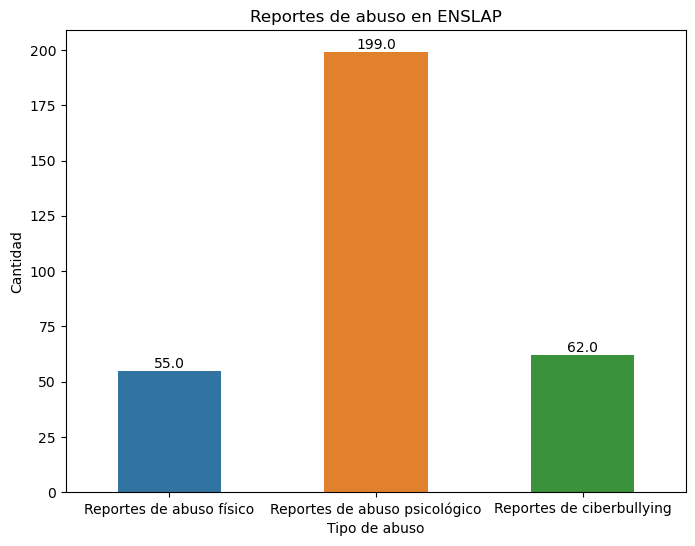

In [7]:
sumas_abusos = ENSLAP[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en ENSLAP')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

## Por género:

En ENSLAP todas las alumnas son mujeres. No es necesario analizar por género.

## Por grupo familiar:

In [8]:
ENSLAP_gf_r = Datos.copy()[Datos['Colegio'] == 'ENSLAP'].drop(columns=['Colegio', 'Género']).groupby('Padres').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

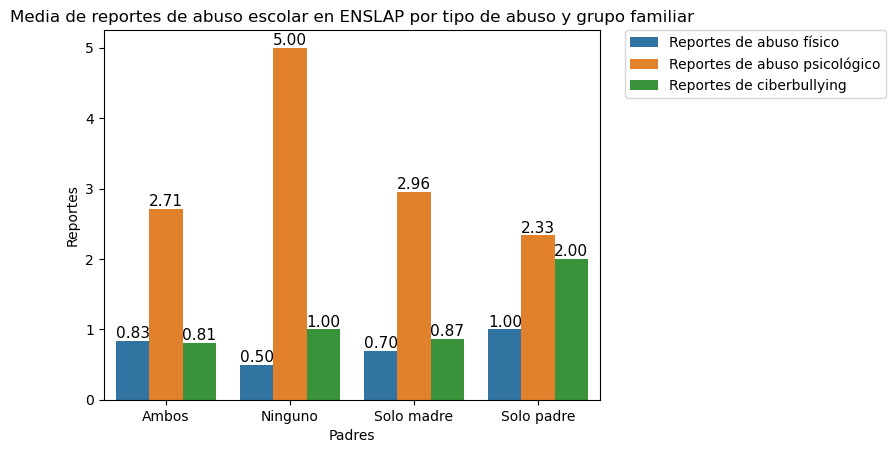

In [9]:
ENSLAP_gf_r_long = pd.melt(ENSLAP_gf_r, id_vars='Padres', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Padres', y='Reportes', hue='Tipo de abuso', data=ENSLAP_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en ENSLAP por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

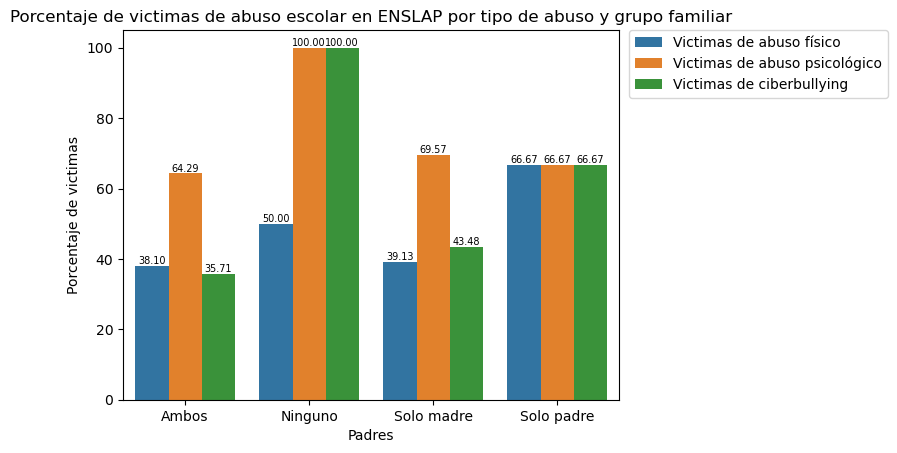

In [10]:
ENSLAP_gf_r_long = pd.melt(ENSLAP_gf_r, id_vars='Padres', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
ENSLAP_gf_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Padres', y='Porcentaje de victimas', hue='Tipo de abuso', data=ENSLAP_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en ENSLAP por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=7, color='black', ha='center', va='bottom') 
    
plt.show()

# INEM

## En general:

In [11]:
INEM = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'INEM']
print("En INEM se reportan", INEM['Reportes de abuso físico'].values[0], "casos de abuso físico, ", INEM['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", INEM['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En INEM se reportan 258.0 casos de abuso físico,  410.0 casos de abuso psicológico y  90 casos de ciberbullying.


In [46]:
INEM_relativos = Datos_por_colegio_relativos.copy()[Datos_por_colegio_relativos['Colegio'] == 'INEM']
print("En INEM el ", INEM_relativos['Victimas de abuso físico'].values[0]*100, "% de los estudiantes reportan ser víctimas de abuso físico, el ", INEM_relativos['Victimas de abuso psicológico'].values[0]*100, "% de abuso psicológico y el ", INEM_relativos['Victimas de ciberbullying'].values[0]*100, "% de ciberbullying.")
print("En INEM cada estudiante reporta", INEM_relativos['Reportes de abuso físico'].values[0], "casos de abuso físico, ", INEM_relativos['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", INEM_relativos['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En INEM el  41.221374045801525 % de los estudiantes reportan ser víctimas de abuso físico, el  51.14503816793893 % de abuso psicológico y el  22.137404580152673 % de ciberbullying.
En INEM cada estudiante reporta 1.9694656488549618 casos de abuso físico,  3.1297709923664123 casos de abuso psicológico y  0.6870229007633588 casos de ciberbullying.


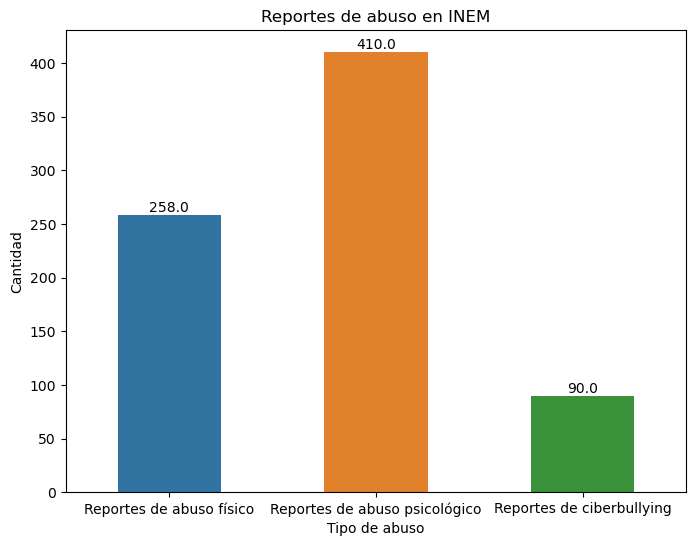

In [13]:
sumas_abusos = INEM[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en INEM')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

## Por género:

In [14]:
INEM_gen_r = Datos.copy()[Datos['Colegio'] == 'INEM'].drop(columns=['Colegio', 'Padres']).groupby('Género').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

Solo hay un estudiante de género "prefiero no decirlo" que reporto 20 casos de abuso físico y 25 de abuso psicológico. Para no crear comparaciones absurdas eliminare ese dato.

In [15]:
INEM_gen_r = INEM_gen_r[INEM_gen_r['Género'] != 'Prefiero no decirlo']

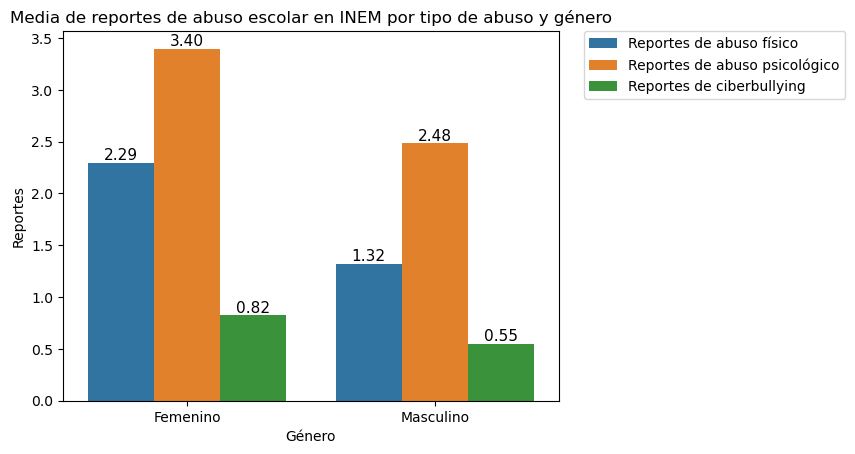

In [16]:
INEM_gen_r_long = pd.melt(INEM_gen_r, id_vars='Género', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Género', y='Reportes', hue='Tipo de abuso', data=INEM_gen_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en INEM por tipo de abuso y género')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

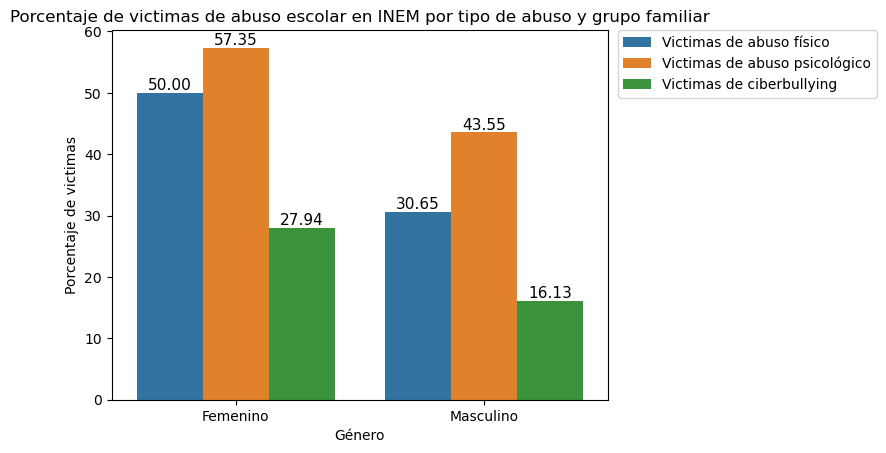

In [17]:
INEM_gen_r_long = pd.melt(INEM_gen_r, id_vars='Género', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
INEM_gen_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Género', y='Porcentaje de victimas', hue='Tipo de abuso', data=INEM_gen_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en INEM por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom') 
    
plt.show()

## Por grupo familiar:

In [31]:
INEM_gf_r = Datos.copy()[Datos['Colegio'] == 'INEM'].drop(columns=['Colegio', 'Género']).groupby('Padres').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

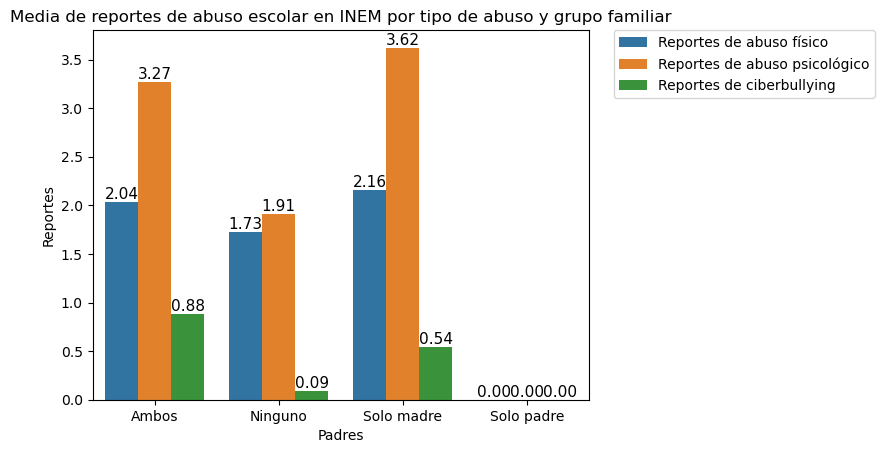

In [19]:
INEM_gf_r_long = pd.melt(INEM_gf_r, id_vars='Padres', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Padres', y='Reportes', hue='Tipo de abuso', data=INEM_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en INEM por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

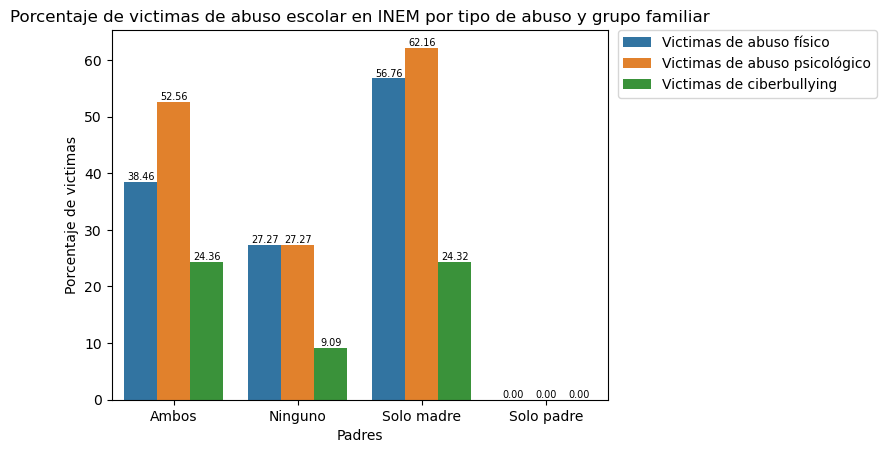

In [20]:
INEM_gf_r_long = pd.melt(INEM_gf_r, id_vars='Padres', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
INEM_gf_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Padres', y='Porcentaje de victimas', hue='Tipo de abuso', data=INEM_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en INEM por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=7, color='black', ha='center', va='bottom') 
    
plt.show()

# IT Gonzalo Suárez R.

## En general:

In [21]:
IT = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'IT Gonzalo Suárez R.']
print("En IT Gonzalo Suárez R. se reportan", IT['Reportes de abuso físico'].values[0], "casos de abuso físico, ", IT['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", IT['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En IT Gonzalo Suárez R. se reportan 127.0 casos de abuso físico,  218.0 casos de abuso psicológico y  54 casos de ciberbullying.


In [22]:
IT_relativos = Datos_por_colegio_relativos.copy()[Datos_por_colegio_relativos['Colegio'] == 'IT Gonzalo Suárez R.']
print("En IT Gonzalo Suárez R. el ", IT_relativos['Victimas de abuso físico'].values[0]*100, "% de los estudiantes reportan ser víctimas de abuso físico, el ", IT_relativos['Victimas de abuso psicológico'].values[0]*100, "% de abuso psicológico y el ", IT_relativos['Victimas de ciberbullying'].values[0]*100, "% de ciberbullying.")
print("En IT Gonzalo Suárez R. cada estudiante reporta ", IT_relativos['Reportes de abuso físico'].values[0], "casos de abuso físico, ", IT_relativos['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", IT_relativos['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En IT Gonzalo Suárez R. el  57.692307692307686 % de los estudiantes reportan ser víctimas de abuso físico, el  73.07692307692307 % de abuso psicológico y el  28.846153846153843 % de ciberbullying.
En IT Gonzalo Suárez R. cada estudiante reporta  2.4423076923076925 casos de abuso físico,  4.1923076923076925 casos de abuso psicológico y  1.0384615384615385 casos de ciberbullying.


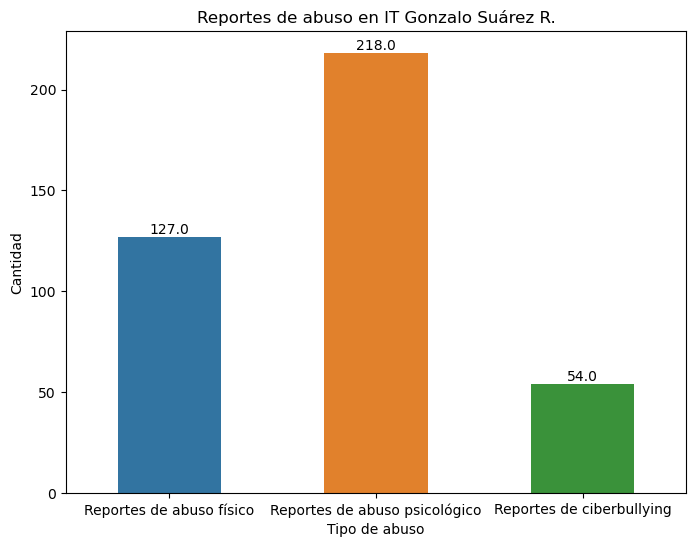

In [23]:
sumas_abusos = IT[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en IT Gonzalo Suárez R.')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

## Por género:

In [24]:
IT_gen_r = Datos.copy()[Datos['Colegio'] == 'IT Gonzalo Suárez R.'].drop(columns=['Colegio', 'Padres']).groupby('Género').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

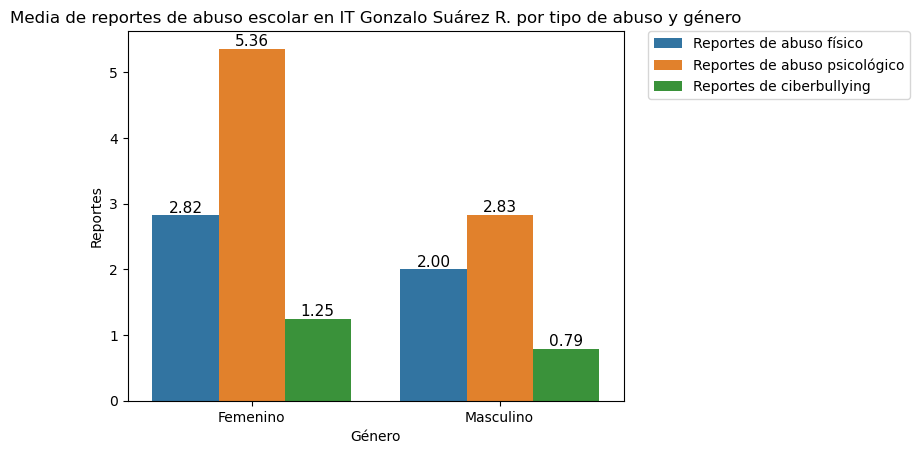

In [47]:
IT_gen_r_long = pd.melt(IT_gen_r, id_vars='Género', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Género', y='Reportes', hue='Tipo de abuso', data=IT_gen_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en IT Gonzalo Suárez R. por tipo de abuso y género')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

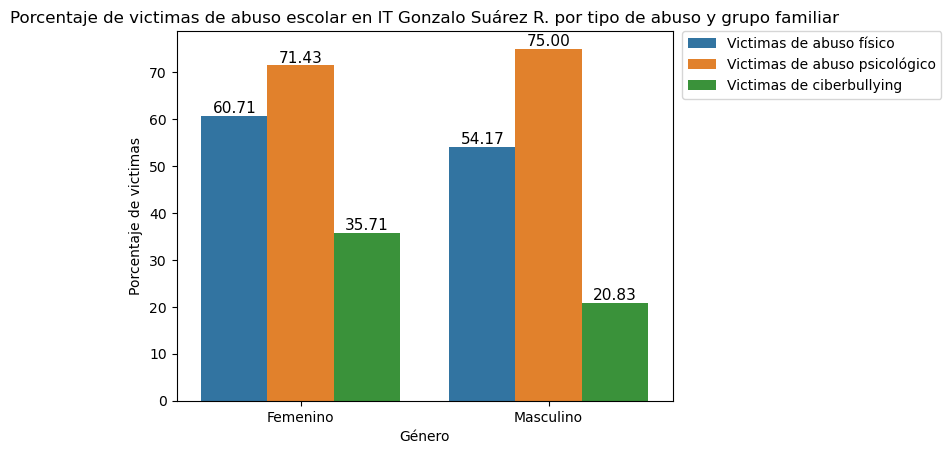

In [30]:
IT_gen_r_long = pd.melt(IT_gen_r, id_vars='Género', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
IT_gen_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Género', y='Porcentaje de victimas', hue='Tipo de abuso', data=IT_gen_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en IT Gonzalo Suárez R. por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom') 
    
plt.show()

## Por grupo familiar:

In [39]:
IT_gf_r = Datos.copy()[Datos['Colegio'] == 'IT Gonzalo Suárez R.'].drop(columns=['Colegio', 'Género']).groupby('Padres').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

Un solo estudiante reporto vivir solo con su padre pero este reporto 15 casos de ciberbullying. Para no introducir comparaciones absurdas voy a eliminar ese dato, pues en media, la comparación con los otros grupos es ridicula. Ademas, no se reportaron estudiantes en este colegio que vivan sin ninguno de sus padres.

In [41]:
IT_gf_r = IT_gf_r[IT_gf_r['Padres'] != 'Solo padre']

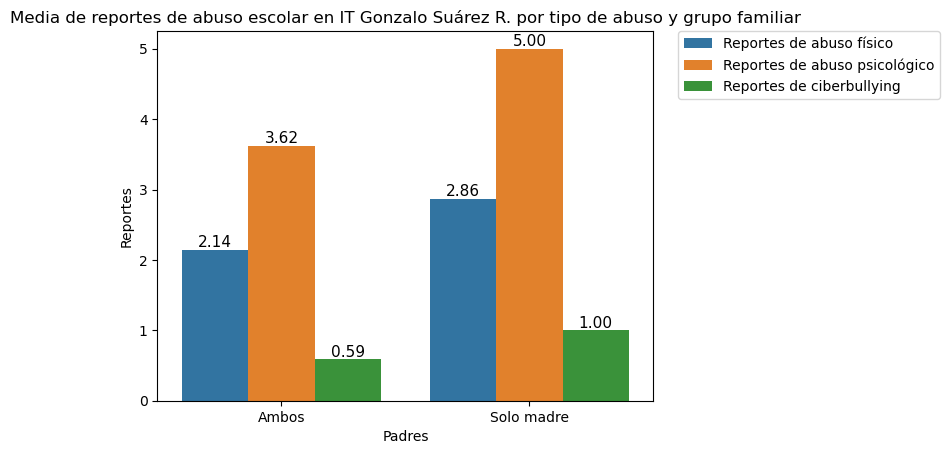

In [48]:
IT_gf_r_long = pd.melt(IT_gf_r, id_vars='Padres', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Padres', y='Reportes', hue='Tipo de abuso', data=IT_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en IT Gonzalo Suárez R. por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

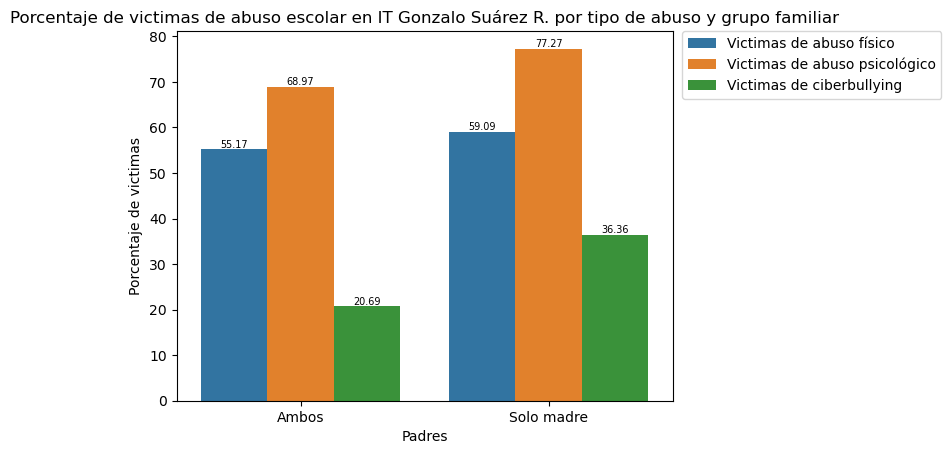

In [50]:
IT_gf_r_long = pd.melt(IT_gf_r, id_vars='Padres', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
IT_gf_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Padres', y='Porcentaje de victimas', hue='Tipo de abuso', data=IT_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en IT Gonzalo Suárez R. por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=7, color='black', ha='center', va='bottom') 
    
plt.show()

# SILVINO RODRIGUEZ

## En general:

In [26]:
SILVINO = Datos_por_colegio.copy()[Datos_por_colegio['Colegio'] == 'SILVINO RODRIGUEZ']
print("En SILVINO RODRIGUEZ se reportan", SILVINO['Reportes de abuso físico'].values[0], "casos de abuso físico, ", SILVINO['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", SILVINO['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En SILVINO RODRIGUEZ se reportan 90.0 casos de abuso físico,  171.0 casos de abuso psicológico y  39 casos de ciberbullying.


In [45]:
SILVINO_relativos = Datos_por_colegio_relativos.copy()[Datos_por_colegio_relativos['Colegio'] == 'SILVINO RODRIGUEZ']
print("En SILVINO RODRIGUEZ el ", SILVINO_relativos['Victimas de abuso físico'].values[0]*100, "% de los estudiantes reportan ser víctimas de abuso físico, el ", SILVINO_relativos['Victimas de abuso psicológico'].values[0]*100, "% de abuso psicológico y el ", SILVINO_relativos['Victimas de ciberbullying'].values[0]*100, "% de ciberbullying.")
print("En SILVINO RODRIGUEZ cada estudiante reporta ", SILVINO_relativos['Reportes de abuso físico'].values[0], "casos de abuso físico, ", SILVINO_relativos['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", SILVINO_relativos['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En SILVINO RODRIGUEZ el  46.835443037974684 % de los estudiantes reportan ser víctimas de abuso físico, el  48.10126582278481 % de abuso psicológico y el  21.518987341772153 % de ciberbullying.
En SILVINO RODRIGUEZ cada estudiante reporta  1.139240506329114 casos de abuso físico,  2.1645569620253164 casos de abuso psicológico y  0.4936708860759494 casos de ciberbullying.


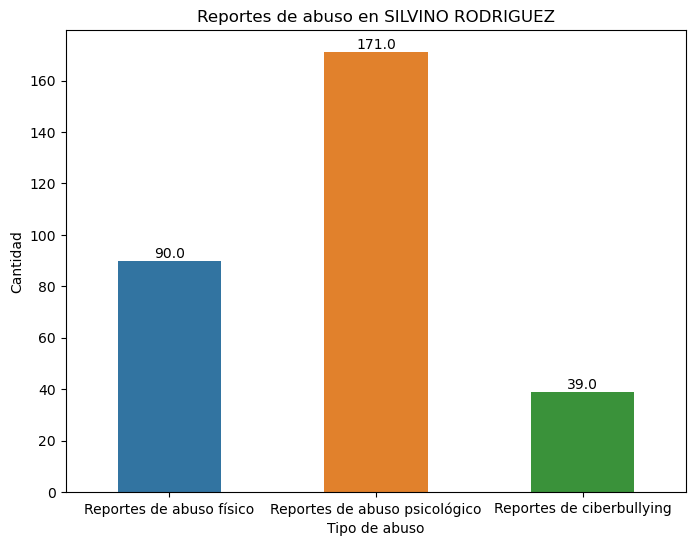

In [ ]:
sumas_abusos = SILVINO[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso en SILVINO RODRIGUEZ')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad') 
plt.show()

## Por género:

In [51]:
SILVINO_gen_r = Datos.copy()[Datos['Colegio'] == 'SILVINO RODRIGUEZ'].drop(columns=['Colegio', 'Padres']).groupby('Género').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

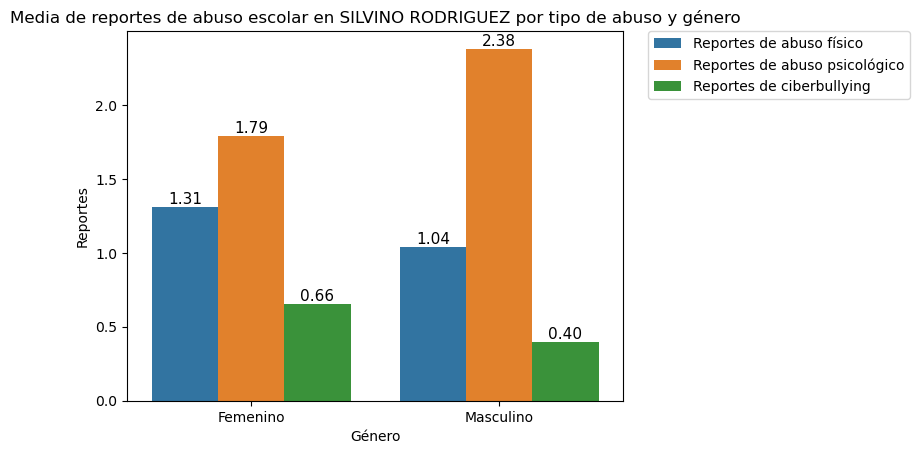

In [54]:
SILVINO_gen_r_long = pd.melt(SILVINO_gen_r, id_vars='Género', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Género', y='Reportes', hue='Tipo de abuso', data=SILVINO_gen_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en SILVINO RODRIGUEZ por tipo de abuso y género')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

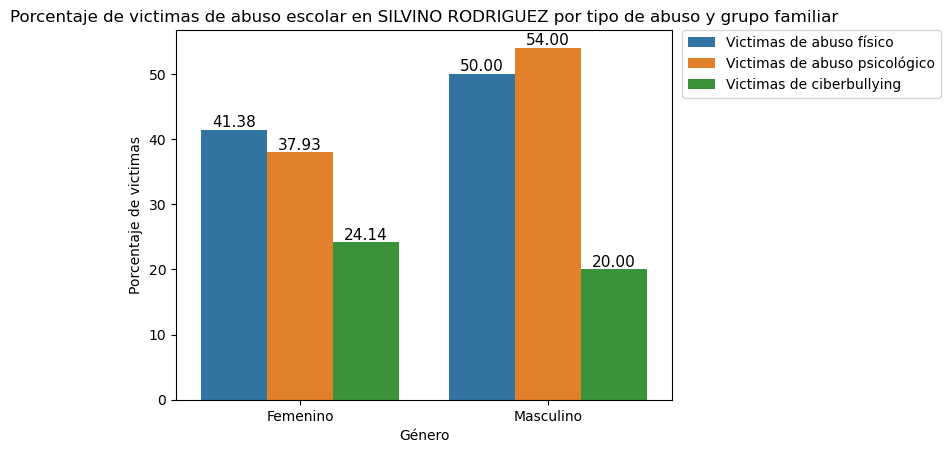

In [57]:
SILVINO_gen_r_long = pd.melt(SILVINO_gen_r, id_vars='Género', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
SILVINO_gen_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Género', y='Porcentaje de victimas', hue='Tipo de abuso', data=SILVINO_gen_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en SILVINO RODRIGUEZ por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom') 
    
plt.show()

## Por grupo familiar

In [58]:
SILVINO_gf_r = Datos.copy()[Datos['Colegio'] == 'SILVINO RODRIGUEZ'].drop(columns=['Colegio', 'Género']).groupby('Padres').mean().reset_index().drop(columns=['Cantidad de estudiantes'])

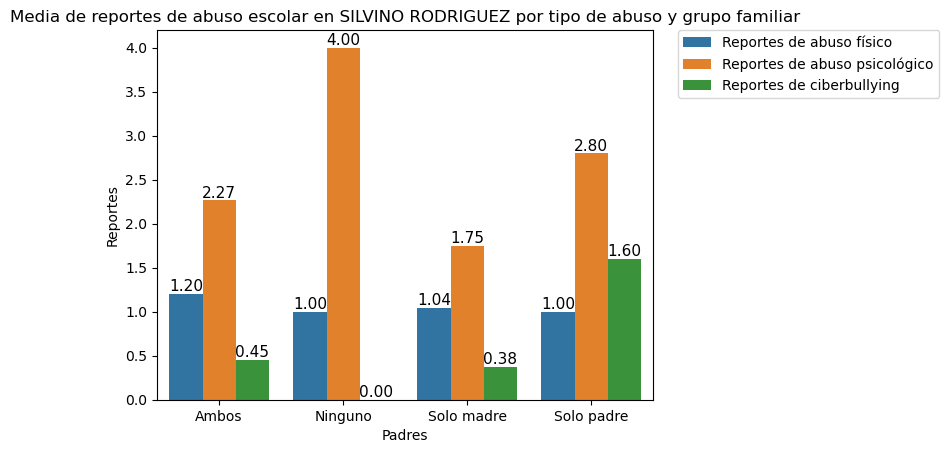

In [60]:
SILVINO_gf_r_long = pd.melt(SILVINO_gf_r, id_vars='Padres', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Padres', y='Reportes', hue='Tipo de abuso', data=SILVINO_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar en SILVINO RODRIGUEZ por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

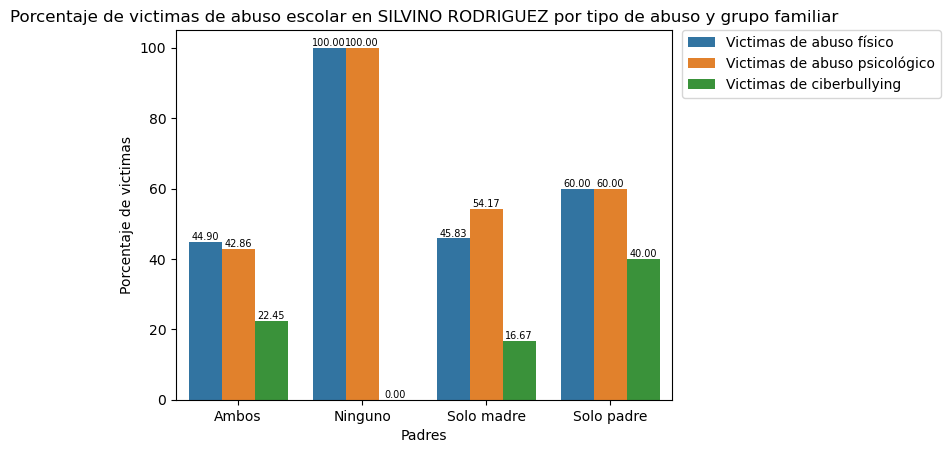

In [62]:
SILVINO_gf_r_long = pd.melt(SILVINO_gf_r, id_vars='Padres', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
SILVINO_gf_r_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Padres', y='Porcentaje de victimas', hue='Tipo de abuso', data=SILVINO_gf_r_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas de abuso escolar en SILVINO RODRIGUEZ por tipo de abuso y grupo familiar')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=7, color='black', ha='center', va='bottom') 
    
plt.show()

# Comparación entre colegios

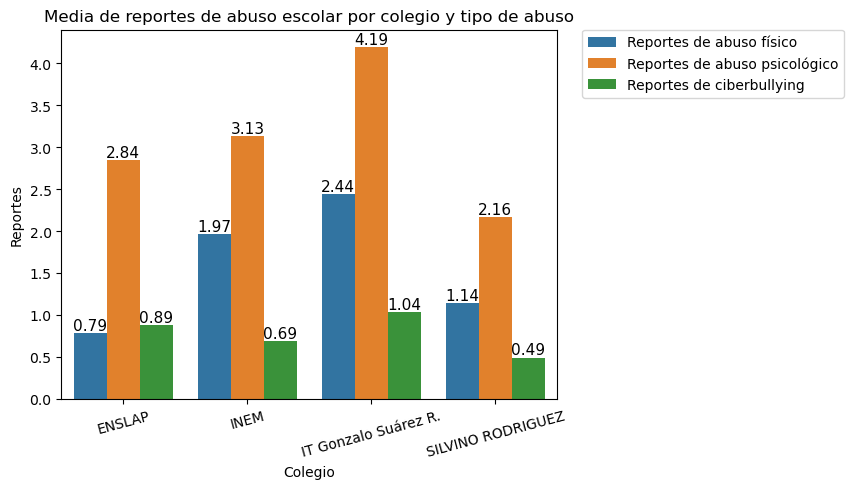

In [ ]:
Datos_por_colegio_relativos_long = pd.melt(Datos_por_colegio_relativos, id_vars='Colegio', value_vars=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying'], var_name='Tipo de abuso', value_name='Reportes')

ax = sns.barplot(x='Colegio', y='Reportes', hue='Tipo de abuso', data=Datos_por_colegio_relativos_long)
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes de abuso escolar por colegio y tipo de abuso')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

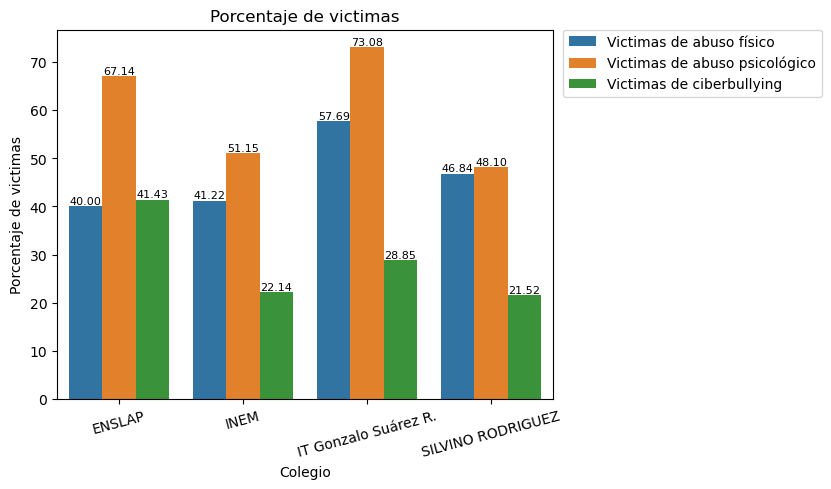

In [ ]:
Datos_por_colegio_relativos_long = pd.melt(Datos_por_colegio_relativos, id_vars='Colegio', value_vars=['Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
Datos_por_colegio_relativos_long['Porcentaje de victimas'] *= 100

ax = sns.barplot(x='Colegio', y='Porcentaje de victimas', hue='Tipo de abuso', data=Datos_por_colegio_relativos_long)
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=8, color='black', ha='center', va='bottom') 
    
plt.show()